In [2]:
import numpy as np
import matplotlib.pyplot as plt
from kmeans import Kmeans

### Prepare splitable data

In [12]:
def make_separatable(n=2,line=[1,1,2,-5], tres = 1):

    dataset = np.empty([1,n+2])

    line = np.array(line)

    for i in range(200):
        point = np.append(10*np.random.normal(size=(1,n)),1)

        if (np.dot(line.T, point)) > tres: 
            dataset = np.vstack((dataset, np.append(point, 1)))
        if (np.dot(line.T, point)) < -tres: dataset = np.vstack((dataset, np.append(point, 0)))

    return dataset[:,0:n+1], dataset[:,n+1]



line = np.array([2,-5,-1])

data, target = make_separatable(n=2,line=line, tres=25)

In [5]:
plt.rcParams.update({'figure.figsize': (8,8)})

### Run Kmeans on the data

current dist variance : 0.6681983317219239  iteration num 300
current dist variance : 0.6149935902144902  iteration num 299
current dist variance : 0.9410622667625717  iteration num 298
current dist variance : 0.6586356758394635  iteration num 297
stop with dist variance : 0.0 on iteration 296


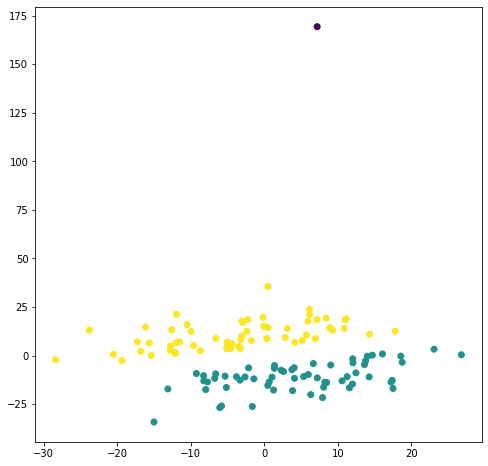

In [20]:
kms = Kmeans(3, 0.0001, 300, True, verbose=True) 
labels, clusters = kms.cluster(data)
plt.scatter(data[:,0], data[:,1], c=labels)

### Match up with sklearn implementation

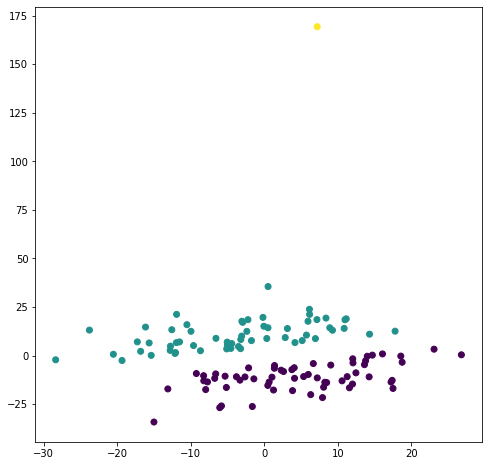

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, tol=0.001, max_iter=300).fit(data)

fig = plt.figure(figsize = (8,8))
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_)

## Some examples with images

In [235]:
plt.rcParams.update({'figure.figsize': (10,10)})

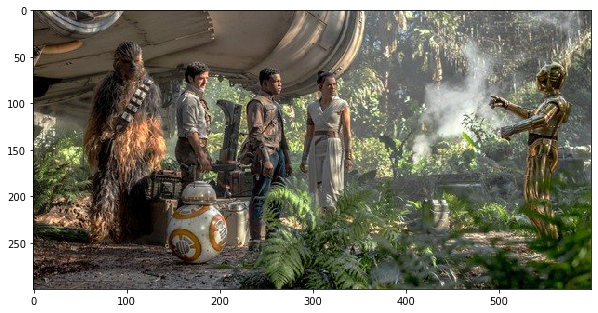

In [236]:
image = plt.imread('star.jpg')
plt.imshow(image)

In [276]:
# home work implementation 

x, y, z = image.shape
image_2d = image.reshape(x*y, z)

kms = Kmeans(10, 0.0001, 600, False, verbose=False) 
labels, clusters = kms.cluster(image_2d)

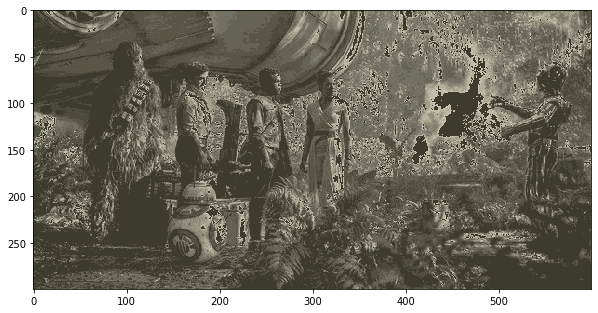

In [277]:
plt.imshow(clusters[labels].reshape(x, y, z))

In [271]:
# Sklearn

kmeans_cluster = KMeans(n_clusters=10)
kmeans_cluster.fit(image_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


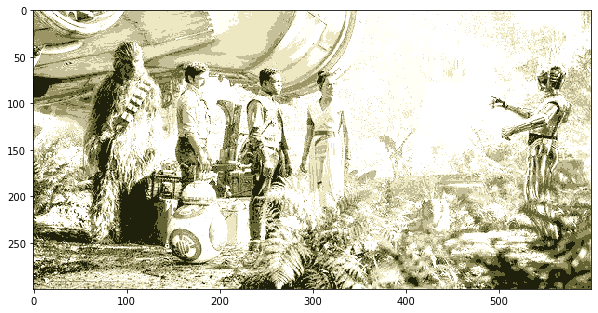

In [272]:
plt.imshow(cluster_centers[cluster_labels].reshape(x, y, z)/100)